#### We are going to perform unsupervised machine learning
____
### 1. Python Preparation

In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.15.4
matplotlib: 3.0.1
pandas: 0.23.4
sklearn: 0.19.1


In [2]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

### 2. Data preparation

In [3]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
ds = pandas.read_csv('iris.data', names = names)

In [4]:
array = ds.values
X = array[:,0:4]    # include every row, column_index: 0-4
Y = array[:,4]      # inlude every row, column_index: 4 (or the label of the flowers)

X contains four features of iris flowers. <br> 
> X contains (sepal length, sepal width, petal length, petal width)

Y contains target name of iris’ species.

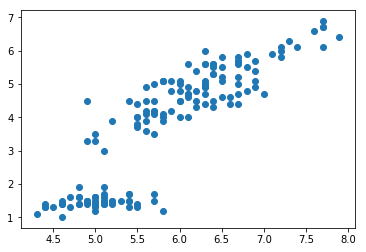

In [5]:
# create the scatter plot of x-axis=Sepal length and y-axis=Petal length
plt.scatter(X[:,0], X[:,2])

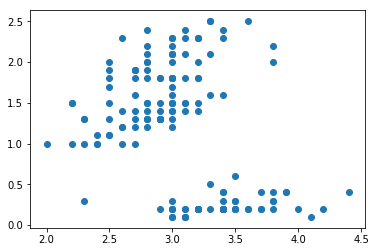

In [6]:
# create the scatter plot of x-axis=Sepal Width and y-axis=Petal Widdth
plt.scatter(X[:,1], X[:,3])

### 3. Data Classification

Next step is to build a classification model from the dataset using the K-Means clustering techniques. 

#### K-means
K-means is a clustering algorithm that aims to partition
dataset into **K** cluster. For example, K=3. Next step is to randomly
select three points(inputs) in order to represent each cluster.

Distance between
each point and centroid will be calculated and each point will be segregated into
respected clusters. Now, re-computing the centroids for all the clusters until the
value of centroid is not changed.

In [7]:
# In this dataset we set cluster=3 because we know that there are 3 species of iris flowers.
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
labels = model.predict(X)    # try to predict the iris dataset on the fitted model
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Text(0, 0.5, 'petal length')

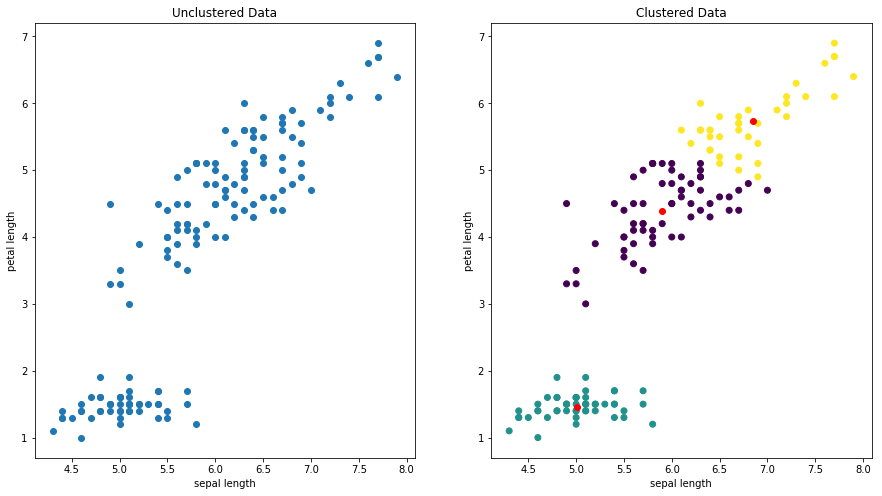

In [9]:
# Train data, based on (lengths)
fig = plt.figure(figsize=(15,8))      # set width x height of the plot
# create 2 subplots
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)
# Set title; fig1 is "unclustered", fig2 is "clustered"
fig1.set_title('Unclustered Data')
fig2.set_title('Clustered Data')
# set x-axis and y-axis values (lengths)
fig1.scatter(X[:,0], X[:,2])
fig2.scatter(X[:,0], X[:,2], c=labels)   # c is colour -> c=labels means colour is based on label (type of flower)
fig2.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,2],color='red')  # create red spot in the center of data
# set x-axis / y-axis label for fig1 and fig2
fig1.set_xlabel('sepal length')
fig1.set_ylabel('petal length')
fig2.set_xlabel('sepal length')
fig2.set_ylabel('petal length')

### 4. Testing data

In [10]:
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])   # arbitrarily input
if predicted_label == 0:
    print(predicted_label, " = ", "Iris-setosa")
elif predicted_label == 1:
    print(predicted_label, " = ", "Iris-versicolor")
elif predicted_label ==2:
    print(predicted_label, " = ", "Iris-virginica")

[1]  =  Iris-versicolor


Text(0, 0.5, 'petal width')

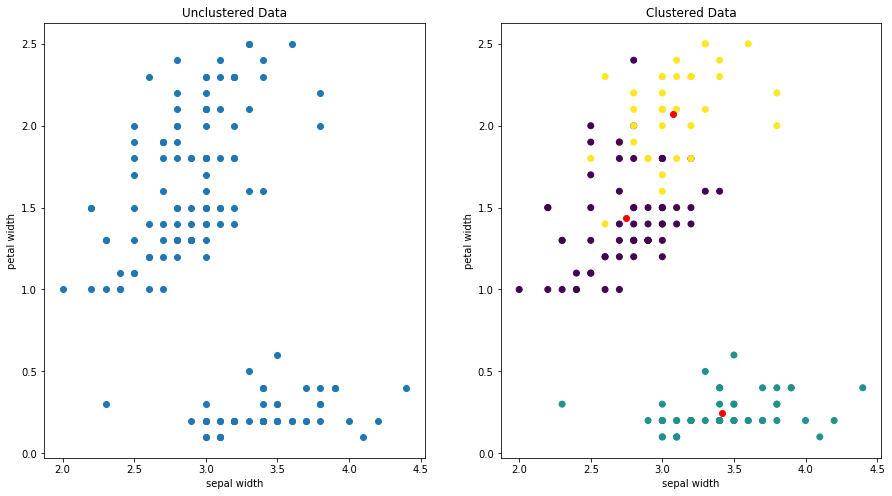

In [11]:
# Do the same steps like above but it is based on (widths) instead
fig = plt.figure(figsize=(15,8))
fig1 = fig.add_subplot(121)
fig2 = fig.add_subplot(122)

fig1.set_title('Unclustered Data')
fig2.set_title('Clustered Data')
# set the x-axis and y-axis values (widths)
fig1.scatter(X[:,1], X[:,3])
fig2.scatter(X[:,1], X[:,3], c=labels)
fig2.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,3],
             color='red')
fig1.set_xlabel('sepal width')
fig1.set_ylabel('petal width')
fig2.set_xlabel('sepal width')
fig2.set_ylabel('petal width')

### 4. Testing data

In [12]:
predicted_label = model.predict([[1, 0, 2, 3]])       # arbritarily input
if predicted_label == 0:
    print(predicted_label, " = ", "Iris-setosa")
elif predicted_label == 1:
    print(predicted_label, " = ", "Iris-versicolor")
elif predicted_label ==2:
    print(predicted_label, " = ", "Iris-virginica")

[1]  =  Iris-versicolor


### Measuring Performance
What you have done is called _unsupervised machine learning_ based on the _K-Mean
clustering model_. There are many approach to evaluate the model. In
this case we will **measure performance of K-means** towards iris flower dataset
by `cross-tabulation` since we know the answer set.

In [13]:
# align labels and species together 
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': Y})
# print(df)            # I'm commenting this because it's too long
print(df.loc[0::50])   # instead I chose to present a bit of data

     labels          species
0         1      Iris-setosa
50        0  Iris-versicolor
100       2   Iris-virginica


In [14]:
#cross-tabulation of labels and species together to evaluate the results of using K-means clustering
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                               
0                  0               48              14
1                 50                0               0
2                  0                2              36


In [15]:
# Inertia measure : to measures how spread out the clusters are (lower is better)
# This score is calculated from each centroid of its cluster after calling fit() function
print(model.inertia_)     # model = KMeans(n_clusters=3) | it is the data that we classified

78.94084142614601
